## Project: Kaggle House Prices
---
By: Gabriel Machado Lopes Gonçalves (gmlg) 

Date: 04/21/2018

In [2]:
# Import packages

import pandas as pd
import numpy as np

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# extract datasets (train and test)

train_v1 = pd.read_csv('datasets/train.csv')
test_v1 = pd.read_csv('datasets/test.csv')

In [4]:
# Show dataset

train_v1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Shape
train_v1.shape

(1460, 81)

In [6]:
train_v1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


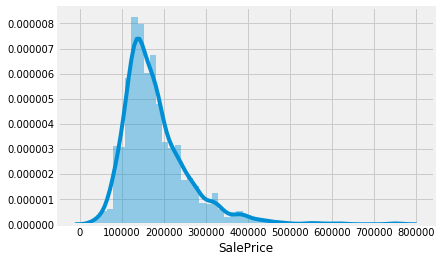

In [7]:
# Sale price distribution
sns.distplot(train_v1.SalePrice)

In [8]:
# Missing values
train_v1.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [9]:
# Preprocessing
# 1. Transform missing values and factorize

def preProcessing(df):
    le = LabelEncoder()
    df_result = df.copy()
    
    for column in df_result:
        if type(df_result[column][0]) == str:
            #print('Col: %s' %column)
            df_result[column].fillna('N/A', inplace=True) # Missing values
            df_result[column] = le.fit_transform(df_result[column]) # Factorize
        else:
            if column == 'Alley' or column == 'MiscFeature' or column == 'Fence' or column == 'ExterQual' \
                or column == 'ExterCond' or column == 'BsmtQual' or column == 'BsmtCond' or column == 'BsmtExposure' :
                    df_result[column].fillna('N/A', inplace=True) # Missing values
                    df_result[column] = le.fit_transform(df_result[column]) # Factorize
            else:
                df_result[column].fillna(0, inplace=True) # Missing values
                
    df_result.drop(['3SsnPorch', 'Street', 'LandContour', 'Condition2', 
                    'BsmtFinSF2', 'Utilities', 'BsmtHalfBath', 'BsmtCond', 'MoSold', 'MiscVal'], axis=1, inplace=True)
      
    return df_result
        
            
train_v2 = preProcessing(train_v1)            
test_v2 = preProcessing(test_v1)

In [10]:
# Correlation
df_corr = abs(pd.DataFrame(train_v2.corr()['SalePrice']))

In [11]:
# List features sort by correlation score

df_corr.sort_values('SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
ExterQual,0.636884
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
BsmtQual,0.593734
KitchenQual,0.589189


In [12]:
# Filter by numerics features

print(train_v1.shape)

train_v2 = train_v2.select_dtypes(include=[np.number])
test_v2 = test_v2.select_dtypes(include=[np.number])

print(train_v2.shape)

(1460, 81)
(1460, 69)


In [13]:
# Create/split dataset train and test

train_v3 = train_v2.sample(frac=0.7, random_state=101)
test_v3 = train_v2.loc[~train_v2.index.isin(train_v3.index)]

In [14]:
# Split features and target 

train_x = train_v3.drop(['Id', 'SalePrice'], axis=1)
train_y = train_v3.SalePrice

test_x = test_v3.drop(['Id', 'SalePrice'], axis=1)
test_y = test_v3.SalePrice

In [15]:
# Linear Regression

model_lr = LinearRegression()

# Fit model
model_lr = model_lr.fit(train_x, train_y)

# Predict
pred_lr = model_lr.predict(test_x)

In [16]:
# Avaliable result
mean_squared_error(pred_lr, test_y)

1211811542.6927738

In [17]:
# Create data frame compare
df = pd.DataFrame()
df['Id'] = test_v3['Id']
df['SalePriceReal'] = test_y 
df['Predict'] = pred_lr
df['diff'] = df['Predict']-df['SalePriceReal']

In [18]:
df.head()

,Id,SalePriceReal,Predict,diff
1,2,181500,207619.746593,26119.746593
3,4,140000,168486.183867,28486.183867
5,6,143000,144695.418990,1695.418990
10,11,129500,121523.377241,-7976.622759
11,12,345000,387373.002908,42373.002908


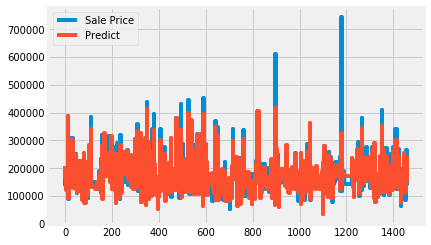

In [19]:
# Plot real and predict values

import numpy as np
from numpy import ma
import matplotlib.pyplot as plt

y = df['SalePriceReal']
x = df.index

plt.step(x, y, label='Sale Price')

y = df['Predict']
plt.step(x, y, label='Predict')

plt.legend()


plt.show()

In [20]:
# Create CSV result - Linear Regression.
#dfResult = pd.DataFrame()

#dfResult['Id'] = test_v2['Id']
#dfResult['SalePrice'] = model_lr.predict(test_v2.drop('Id', axis=1))
#dfResult.to_csv('result_v2.csv', index=False)

In [21]:
# Test solution with Random Forest Regressor

model_rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5, random_state = 101)

# Create model
modelo_v2 = model_rf.fit(train_x, train_y)

# Test predict
previsoes = modelo_v2.predict(test_x)

In [22]:
# Check 

mean_squared_error(previsoes, test_y)

913454973.2123487

In [23]:
scores = cross_val_score(modelo_v2, train_x, train_y)
mean = scores.mean()
print(scores)
print(mean)

[ 0.79877707  0.79750328  0.8723573 ]
0.822879213984


In [24]:
# Test solution with Extra Tree Regressor

model_extraTreeRegressor = ExtraTreesRegressor(n_estimators=100, min_samples_leaf=5, random_state=101)

# Create model
modelo_v3 = model_extraTreeRegressor.fit(train_x, train_y)

# Test predict
pred_v3 = model_extraTreeRegressor.predict(test_x)

In [25]:
# Check
mean_squared_error(pred_v3, test_y)

834276417.60652673

In [26]:
# Use GridSearch to optimize Random Forest Regressor

# Create param list
param_grid = {"n_estimators": [10,100],
              "max_features": [1, 3, 10, 'auto', None],
              "min_samples_leaf": [1, 2, 3, 5],
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# Executing ...
grid_search = GridSearchCV(modelo_v2, param_grid = param_grid)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100], 'max_features': [1, 3, 10, 'auto', None], 'min_samples_leaf': [1, 2, 3, 5], 'bootstrap': [True, False], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# Print scores

grid_search.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75646, std: 0.02745, params: {'bootstrap': True, 'criterion': 'mse', 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 10},
 mean: 0.78489, std: 0.04280, params: {'bootstrap': True, 'criterion': 'mse', 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 100},
 mean: 0.70424, std: 0.03501, params: {'bootstrap': True, 'criterion': 'mse', 'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 10},
 mean: 0.71519, std: 0.04401, params: {'bootstrap': True, 'criterion': 'mse', 'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 100},
 mean: 0.67254, std: 0.04340, params: {'bootstrap': True, 'criterion': 'mse', 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 10},
 mean: 0.68647, std: 0.02814, params: {'bootstrap': True, 'criterion': 'mse', 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 100},
 mean: 0.60990, std: 0.03629, params: {'bootstrap': True, 'criterion': 'mse', 'max_features': 1, 'min_samples_leaf': 5, 'n_estimators': 10},
 mean: 0.6

In [28]:
# Create model optimized
model_rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, random_state = 101, bootstrap=False, 
                                 criterion='mse', max_features=10)

# Model
modelo_v4 = model_rf.fit(train_x, train_y)

# Predict test dataset
pred_v4 = modelo_v4.predict(test_x)

In [29]:
# Check error
mean_squared_error(pred_v4, test_y)

709914675.24220943

In [30]:
# Create CSV result.
dfResult = pd.DataFrame()

dfResult['Id'] = test_v2['Id']
dfResult['SalePrice'] = modelo_v4.predict(test_v2.drop('Id', axis=1))
dfResult.to_csv('result_v5.csv', index=False)